# Problem 1:

### Question 1:

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

loss_dic ={}
coeff_dic = {}
#import necessary data
data_train = pd.read_csv('wind_train.csv')
data_test = pd.read_csv('wind_test.csv')

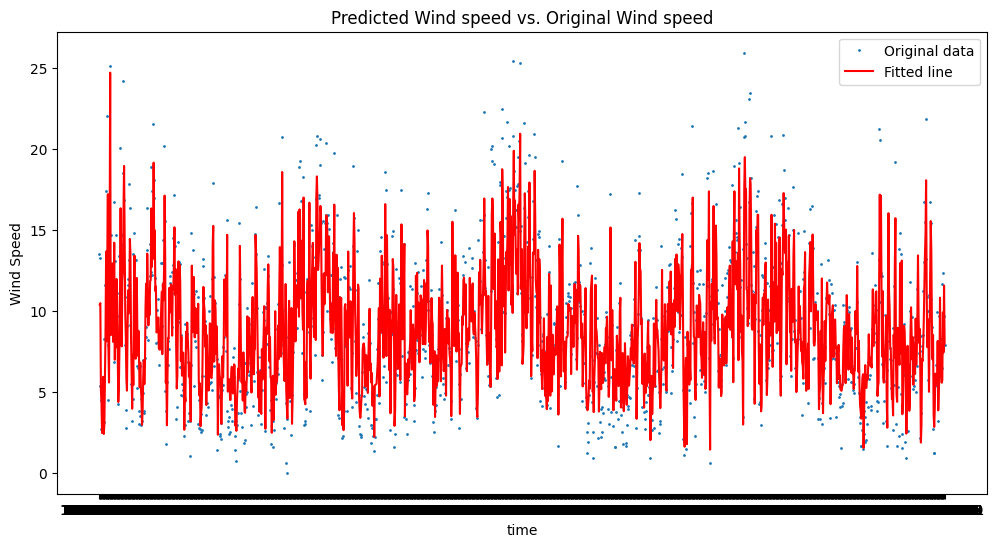

thetas are: [ 0.74657977  0.13324713  0.293872   -0.30924845]
training loss is 0.03898319532457822


In [2]:

##### conduct data extraction to develop i-1 values for the regression
X_cols = ['Wind', 'Rain', 'MaxTemp', 'MinTemp']
y_col = 'Wind'

# Shift feature columns by one day
data_shifted = data_train[X_cols].shift(1)
data_shifted.columns = [col + '_prev_day' for col in data_shifted.columns]
data_shifted = data_shifted.dropna()

# Create x and y for training set
y = data_train[y_col].iloc[1:]
X = data_shifted

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()


#####1.a#####

# Conduct least squares calculation
X_t = np.transpose(X)
X_t_X = np.dot(X_t, X)
X_t_X_inv = np.linalg.inv(X_t_X)
X_t_X_inv_X_t = np.dot(X_t_X_inv, X_t)
theta = np.dot(X_t_X_inv_X_t, y)

#prediction
X_for_pred = data_train[1:]
y_pred = np.dot(X, theta)
mse = np.mean(y_pred - y) ** 2


#####1.b#####

plt.figure(figsize=(12, 6))
plt.plot(data_train['Date'], data_train['Wind'], 'o', label='Original data', markersize=1)
plt.plot(X_for_pred['Date'], y_pred , 'r', label='Fitted line')
plt.title("Predicted Wind speed vs. Original Wind speed")
plt.xlabel("time")
plt.ylabel("Wind Speed")
plt.legend()
plt.show()
'''
The plot can be found as an output of this code section below. The plot shows the original observed points in blue and the predicted line in red.
'''

#####1.c#####

print(f'thetas are: {theta}')
print(f'training loss is {mse}')
loss_dic['model1'] = mse
coeff_dic['model1'] = theta
train_loss = [np.mean((y_pred-y)**2)]
loss_dic['model1'] = train_loss
"""
model_coeff = [ 0.74657977  0.13324713  0.293872   -0.30924845] which would resolve to be the theta's attached to the following features:
previous day Wind = 0.74657977
previous day Rain = 0.13324713
previous day MaxTemp = 0.293872
previous day MinTemp = -0.30924845

The interpretation of these values for theta should be that when all other values are left the same, a unit change in one feature would
result in a change in the wind speed of that value of theta.

an example would be that if the previous days MinTemp was 1 higher, the wind value would be predicted 0.3092 lower
"""


# Shift feature columns by one day
data_shifted_test = data_test[X_cols].shift(1)
data_shifted_test.columns = [col + '_prev_day' for col in data_shifted_test.columns]

data_shifted_test = data_shifted_test.dropna()

# Create y and x for test set
y = data_test[y_col].iloc[1:]  
X = data_shifted_test

# Convert to numpy arrays
X_test = X.to_numpy()
y_test = y.to_numpy()

#prediction
y_pred_test = np.dot(X_test, theta)
test_loss = np.mean((y_pred_test-y_test)**2)
loss_dic['model1'].append(test_loss)


model_coeff = [ 0.74657977,  0.13324713,  0.293872,   -0.30924845] which would resolve to be the theta's attached to the following features:<br>
previous day Wind = 0.74657977<br>
previous day Rain = 0.13324713<br>
previous day MaxTemp = 0.293872<br>
previous day MinTemp = -0.30924845<br>
<br>
The interpretation of these values for theta should be that when all other values are left the same, a unit change in one feature would<br>
result in a change in the wind speed of that value of theta.<br>
<br>
an example would be that if the previous days MinTemp was 1 higher, the wind value would be predicted 0.3092 lower<br>

### Question 2

#### Part a

Model 2:  Model 2 is not invertable.  Based on this the OLS formula is not valid.  The 5 X 1460 matrix has a rank of 4.  due to the nature that the MinTemp, MaxTemp and TempDiff are not linearly independent the rank is lower than the number of features.  For this reason it is not invertable. <br>
<br>
Model 3: with the removal of MaxTemp, the rank of the matrix X in this case remains 4.  With the feature vector being 4 x 1460 the matrix is invertable and therefore the OLS formula can be applied.<br>
<br>
Model 4: with the introduction of nonlinearity through the squareroot of the differential temperature the rank of this matrix is now 5.  That included with the features matrix being 5 x 1460 shows that this matrix is invertable.

#### Part b

Model 3

In [3]:
X_cols = ['Wind', 'Rain', 'MaxTemp', 'MinTemp', 'TempDiff']
y_col = 'Wind'

#create new value for differential temperature
x_new = data_train['MaxTemp']-data_train['MinTemp']
data_train['TempDiff'] = x_new

# Shift feature columns by one day
data_shifted = data_train[X_cols].shift(1)
data_shifted.columns = [col + '_prev_day' for col in data_shifted.columns]

data_shifted = data_shifted.dropna()
del data_shifted['MaxTemp_prev_day']

# Create x and y for training set
y = data_train[y_col].iloc[1:]
X = data_shifted

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

# Conduct least squares calculation
X_t = np.transpose(X)
X_t_X = np.dot(X_t, X)
X_t_X_inv = np.linalg.inv(X_t_X)
X_t_X_inv_X_t = np.dot(X_t_X_inv, X_t)
theta = np.dot(X_t_X_inv_X_t, y)

#prediction
X_for_pred = data_train[1:]
y_pred = np.dot(X, theta)
mse = np.mean(y_pred - y) ** 2



print(f'thetas are: {theta}')
print(f'training loss is {mse}')

coeff_dic['model3'] = theta
train_loss = [np.mean((y_pred-y)**2)]
loss_dic['model3'] = train_loss

#######

#create new value for differential temperature
x_new = data_test['MaxTemp']-data_test['MinTemp']
data_test['TempDiff'] = x_new

# Shift feature columns by one day
data_shifted_test = data_test[X_cols].shift(1)
data_shifted_test.columns = [col + '_prev_day' for col in data_shifted_test.columns]
data_shifted_test = data_shifted_test.dropna()
del data_shifted_test['MaxTemp_prev_day']



# Create x and y for test set
y = data_test[y_col].iloc[1:] 
X = data_shifted_test

# Convert to numpy arrays
X_test = X.to_numpy()
y_test = y.to_numpy()

#prediction
y_pred_test = np.dot(X_test, theta)
test_loss = np.mean((y_pred_test-y_test)**2)
loss_dic['model3'].append(test_loss)

thetas are: [ 0.74657977  0.13324713 -0.01537645  0.293872  ]
training loss is 0.038983195324580076


Model 4:

In [4]:
X_cols = ['Wind', 'Rain', 'MaxTemp', 'MinTemp', 'TempDiff']
y_col = 'Wind'

#create new value for differential temperature
x_new = data_train['MaxTemp']-data_train['MinTemp']
x_new_sqrt = x_new.apply(np.sqrt)
data_train['TempDiff'] = x_new_sqrt


# Shift feature columns by one day
data_shifted = data_train[X_cols].shift(1)
data_shifted.columns = [col + '_prev_day' for col in data_shifted.columns]

data_shifted = data_shifted.dropna()

# Create x and y for training set
y = data_train[y_col].iloc[1:] 
X = data_shifted

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()


X_t = np.transpose(X)
X_t_X = np.dot(X_t, X)
X_t_X_inv = np.linalg.inv(X_t_X)
X_t_X_inv_X_t = np.dot(X_t_X_inv, X_t)
theta = np.dot(X_t_X_inv_X_t, y)

#prediction
X_for_pred = data_train[1:]
y_pred = np.dot(X, theta)
mse = np.mean(y_pred - y) ** 2


print(f'thetas are: {theta}')
print(f'training loss is {mse}')
coeff_dic['model4'] = theta
train_loss = [np.mean((y_pred-y)**2)]
loss_dic['model4'] = train_loss


#######

x_new = data_test['MaxTemp']-data_test['MinTemp']
x_new_sqrt = x_new.apply(np.sqrt)
data_test['TempDiff'] = x_new_sqrt

# Shift feature columns by one day

data_shifted_test = data_test[X_cols].shift(1)
data_shifted_test.columns = [col + '_prev_day' for col in data_shifted_test.columns]
data_shifted_test = data_shifted_test.dropna()

# Create X and y for test set
y = data_test[y_col].iloc[1:]
X = data_shifted_test

# Convert to numpy arrays
X_test = X.to_numpy()
y_test = y.to_numpy()

#prediction
y_pred_test = np.dot(X_test, theta)
test_loss = np.mean((y_pred_test-y_test)**2)
loss_dic['model4'].append(test_loss)

thetas are: [ 0.62421199  0.11642997 -0.50445607  0.3770674   2.95437974]
training loss is 0.0007830463866650301


In [5]:
df_loss = pd.DataFrame.from_dict(loss_dic)
df_loss.index = ['train_loss', 'test_loss']
print(f"model 1 coefficients are {coeff_dic['model1']}")
print(f"model 3 coefficients are {coeff_dic['model3']}")
print(f"model 4 coefficients are {coeff_dic['model4']}")

model 1 coefficients are [ 0.74657977  0.13324713  0.293872   -0.30924845]
model 3 coefficients are [ 0.74657977  0.13324713 -0.01537645  0.293872  ]
model 4 coefficients are [ 0.62421199  0.11642997 -0.50445607  0.3770674   2.95437974]


In [6]:
print('Loss Values for the applicable models')
print(df_loss) 

Loss Values for the applicable models
               model1     model3     model4
train_loss  13.289683  13.289683  12.636732
test_loss   17.797117  17.797117  17.286578


coefficients for the models are:
<br>

|  model             | Theta 1    |  Theta 2 |  Theta 3   |  Theta 4   |  Theta 5  |
|--------------------|------------|----------|------------|------------|-----------|
|model 1 coefficients| 0.74657977| 0.13324713|  0.293872  | -0.30924845|  -        |
|model 3 coefficients| 0.74657977| 0.13324713| -0.01537645|  0.293872  |  -        |
|model 4 coefficients| 0.62421199| 0.11642997| -0.50445607|  0.3770674 | 2.95437974| 


<br>

Loss Values for the applicable models<br>

|            |model1     |model3     |model4    |
|------------|-----------|-----------|----------|
|train_loss  |13.289683  |13.289683  |12.636732 |
|test_loss   |17.797117  |17.797117  |17.286578 |

<br>



<br>
The resutls for model 1 and 3 are not surprising as the change in variables from max and min temperature to min and differential temperature is just a linear substitution.  Due to this while the coefficients may have changed, the loss values for both training and test are the same.<br>
<br>
Additionally the implementation of the square root term only provided a slight improvement in training loss and provided an even smaller reduction in the test loss. The addition of complexity did not provide a sustantial improvement, but in following logic it is not surprising that additional features have improved the loss function for both training and test.

### Question 3

#### Part a

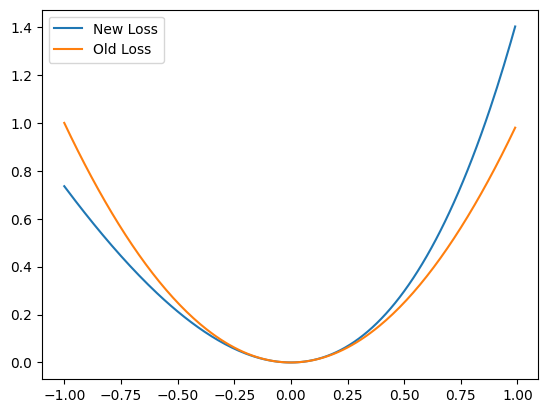

In [7]:
#plot the equation representing loss provided in the question vs a standard squared loss
X = np.arange(-1, 1, 0.01)
y = 2*np.exp(X)-2*X-2
z =X**2
plt.plot(X, y, label = 'New Loss')
plt.plot(X, z, label= 'Old Loss')
plt.legend()


The implementation of this new loss function provides a higher rate of increase for the loss when x>1 as seen by y = 1.4 at x=1 and 0.8 at x=-1.  


#### Part b

Please see attached final page for hand written derivation

  # ########Problem 2:########

### Question a

In [8]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

#import necessary data
data_train = pd.read_csv('forest_fires_train.csv')
data_test = pd.read_csv('forest_fires_test.csv')

In [39]:
##### conduct data extraction to develop i-1 values for the regression

X = data_train.iloc[:, 3:-1] 
y = data_train.iloc[:, -1]
X = X.to_numpy()

y = y.to_numpy()

#standardize X
X = (X - X.mean(axis=0)) / X.std(axis=0)

#add column of ones at front of x for theta0
X = np.column_stack((np.ones(X.shape[0]), X))

X_test = data_test.iloc[:, 3:-1] 
y_test = data_test.iloc[:, -1]
X_test = X_test.to_numpy()

y_test = y_test.to_numpy()

#standardize X_test
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

#add column of ones at front of x for theta0
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))


0.925


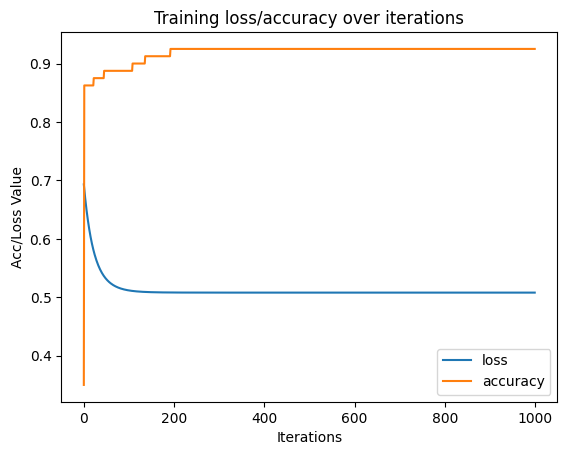

In [10]:
#create sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#function to determine the accuracy of the model based on the implementation of a sigmoid function
def accuracy_check(X, y, theta):
    z = np.dot(X, theta)
    g = sigmoid(z)
    y_pred = np.round(g)
    accuracy = np.mean(y_pred == y)
    return accuracy

#function to conduct logistic regression using gradient descent
def logistic_regression_gradient_descent(X, y, lamb, learning_rate=0.01, iterations=1000):
    loss_track = []
    accuracy_track = []
    n, m = X.shape
    theta = np.zeros(m)
    for _ in range(iterations):
        z = np.dot(X, theta)
        g = sigmoid(z)
        loss = -1/n * np.sum(y * np.log(g) + (1 - y) * np.log(1 - g)) + (lamb/2) * np.sum(theta**2)
        loss_track.append(loss)
        accuracy_track.append(accuracy_check(X, y, theta))
        gradient = np.dot(X.T, (g - y)) / n + (lamb) * theta
        theta -= learning_rate * gradient
    print(accuracy_check(X, y, theta))    
    plt.plot(loss_track, label='loss')
    plt.plot(accuracy_track, label = 'accuracy')
    plt.title("Training loss/accuracy over iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Acc/Loss Value")
    plt.legend()

    return theta

# Conduct logistic regression using training data
model_coeff = logistic_regression_gradient_descent(X, y, 1)

### Question b

In [11]:
#print all model parameters
i=0
for theta in model_coeff:
    print(f'theta {i} is {theta}')
    i+=1

theta 0 is 0.12426532970355492
theta 1 is 0.12495969482861154
theta 2 is -0.0952518393452984
theta 3 is 0.04079688951704999
theta 4 is -0.11271417608585263
theta 5 is 0.20775807735247542
theta 6 is 0.11731700554155507
theta 7 is 0.12100650858645648
theta 8 is 0.14709931465053952
theta 9 is 0.11941462062414127
theta 10 is 0.14795702907330016



|Feature|Theta|Value|
|-|-|-|
|Intercept|  theta 0 | 0.12426532970355492|
|Temp|  theta 1 | 0.12495969482861154|
|RH  | theta 2 | -0.0952518393452984|
|Ws   |theta 3 | 0.04079688951704999|
|Rain | theta 4 | -0.11271417608585263|
|FFMC | theta 5 | 0.20775807735247542|
|DMC   |theta 6 | 0.11731700554155507|
|DC  |theta 7 | 0.12100650858645648|
|ISI  |theta 8 | 0.14709931465053952|
|BUI  |theta 9 | 0.11941462062414127|
|FWI   |theta 10| 0.14795702907330016|

Both relative humidity and rainfall being negative make sense.  The increase in moisture in the system logically would reduce the likelihood of fires.  While windspeed having a positive effect is not necessarily expected, its value is low to the point where it does not seem to have a significant impact.<br>

Additionally these parameters can be interpreted as a change in 1 standard deviation for that feature while all other features remain constant would result in a e^theta change in y.<br>
<br>
The remaining features would all be indicitive of an increased value would lead to an increased likelihood of fire.

### Question c

In [30]:
#repurposed helper functions from 6.C51 Problem set 1
def train_and_eval_model(X_train, y_train, X_test, y_test, lmbds, phis, pen):
    '''
    Uses a feature matrix X and labels y to train and evaluate
    a logistic regression model.

    Sweeps over all combinations of lambda and phi to choose the
    best setting.
    '''
    
    #Choose best hyperparameters and train model w/ these parameters
    best_lmbd, best_phi, best_theta = sweep_hyperparameters(X_train, y_train, X_test, y_test, lmbds, phis, pen)
    
    # Produce estimate of how model will perform on unseen data
    test_loss = evaluate_model(best_theta, best_phi, X_test, y_test)
    return best_lmbd, best_phi, best_theta, test_loss

def sweep_hyperparameters(X_train, y_train, X_test, y_test, lmbds, phis, pens):
    '''
    Finds the best settings of lambda and phi, and trains a logistic regression model with these parameters.
    '''
    i=0
    for pen in pens:
        best_lmbd, best_phi, best_theta = None, None, None
        best_err = float('inf')
        loss_tracker = []
        accuracy_tracker_train = []
        accuracy_tracker_test = []
        for phi in phis:
            for lmbd in lmbds:
                # train model on train data
                theta = fit(X_train, y_train, phi, lmbd, pen)
                # evaluate on train data
                y_pred_train = predict(X_train, phi, theta)
                val_loss = logloss(y_train, y_pred_train)
                predicted_labels_train = np.argmax(y_pred_train, axis=1)
                
                y_pred_test = predict(X_test, phi, theta)
                predicted_labels_test = np.argmax(y_pred_test, axis=1)


                acc_val_train = accuracy_score(y_train, predicted_labels_train)
                accuracy_tracker_train.append(acc_val_train)
                acc_val_test = accuracy_score(y_test, predicted_labels_test)
                accuracy_tracker_test.append(acc_val_test)

                if val_loss < best_err:
                    best_err = val_loss
                    best_lmbd = lmbd
                    best_phi = phi
                    best_theta = theta

            if len(phis) <2:
                best_test_acc = max(accuracy_tracker_test)
                best_train_acc = max(accuracy_tracker_train)
                print(f'best test accuracy for {pen} is {best_test_acc}')
                print(f'best lambda for {pen} is {lmbds[accuracy_tracker_test.index(best_test_acc)]}')
                
        if len(phis)<2:
            plt.plot(lmbds, accuracy_tracker_train, label = pen + ' train acc')
            plt.plot(lmbds, accuracy_tracker_test, label = pen + ' test acc')
            plt.title(f'Training and Test accuracy over lambda for {pen} ')
            plt.xlabel("Lambda")
            plt.ylabel("Accuracy")
            plt.legend()
            plt.show()

    return best_lmbd, best_phi, best_theta

def fit(X, y, phi, lmbd, pen):
    '''
    Fits a logistic regression model on the data (X, y), using the parameters
    phi and lmbd. Returns the learned regression coefficients theta
    '''
    if lmbd == 0: 
        theta = LogisticRegression(penalty=None, solver = 'saga', max_iter = 10000)
    else:
        
        theta = LogisticRegression(penalty=pen, C=1/lmbd, solver = 'saga', max_iter= 10000)
    
    
    theta.fit(X[:, phi], y)
   
    return theta

def predict(X, phi, theta):
    '''
    Returns predictions for given model theta on phi(X).
    '''
    return theta.predict_proba(X[:, phi])

def logloss(y, y_hat):
    '''
    Returns logistic loss between targets y and predictions y_hat.
    '''
    return log_loss(y, y_hat)

def evaluate_model(theta, phi, X_test, y_test):
    '''
    Evaluates a trained logistic regression model.
    '''
    y_pred = predict(X_test, phi, theta)
    test_loss = logloss(y_test, y_pred)
    
    return test_loss




best test accuracy for l1 is 0.9512195121951219
best lambda for l1 is 0.07


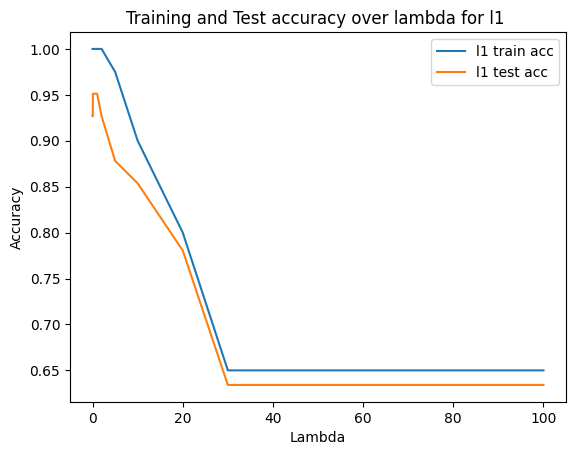

best test accuracy for l2 is 0.926829268292683
best lambda for l2 is 0


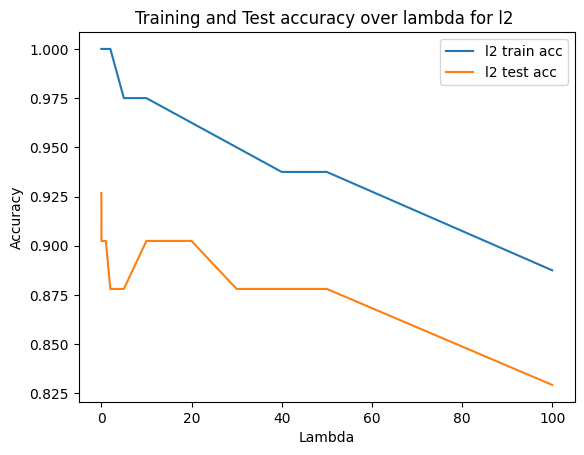

In [31]:
X = data_train.iloc[:, 3:-1] 
y = data_train.iloc[:, -1]
X = X.to_numpy()

y = y.to_numpy()
#standardize X
X = (X - X.mean(axis=0)) / X.std(axis=0)

X_test = data_test.iloc[:, 3:-1] 
y_test = data_test.iloc[:, -1]
X_test = X_test.to_numpy()

y_test = y_test.to_numpy()
#standardize X
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)


phis = [[True,True,True,True,True,True,True,True, True,True]]
penalty = ['l1', 'l2']
lmbds = [0, 0.01, 0.02, .04, .05, .07, .1, .2, .3, .4, .5, 1, 2, 5, 10, 20, 30, 40, 50, 100]
best_lmbd, best_phi, best_theta, test_loss = train_and_eval_model(X, y, X_test, y_test, lmbds, phis, penalty)


|Penalty|best lambda|test accuracy|
|-|-|-|
|Lasso (l1)|0.07|0.95|
|Ridge (l2)|0|0.93|

### Question d

In [32]:
from itertools import combinations

def generate_combinations():
    # Generate all combinations of 2 True and 9 False
    internal_combinations = list(combinations(range(10), 2))
    all_combinations = []
    for comb in internal_combinations:
        lst = [False] * 10
        for idx in comb:
            lst[idx] = True
        all_combinations.append(lst)
    return all_combinations

# Generate all combinations
phi_list = generate_combinations()



In [35]:

penalty = ['none']
lmbds = [0]
best_lmbd, best_phi, best_theta, test_loss = train_and_eval_model(X, y, X_test, y_test, lmbds, phi_list, penalty)
print(f'best phi is {best_phi}')
print(f'best theta is {best_theta.coef_[0]}')


best phi is [True, False, False, False, False, False, False, True, False, False]
best theta is [ 2.50383109 34.28674666]


In [36]:
X_new = X_test[:,best_phi]


print(best_theta.score(X_new, y_test))




0.975609756097561


The test accuracy score that I have calculated appears to be higher, but I would have thought that it would have been lower. <br>
<br>
The best features are Temp and ISI with a test accuracy of 0.98.<br>
<br>
With the reduction of features it is likely that overfitting was prevented, but I was unable to fully resolve this difference in my mind.<br>
<br>
Regularization can be less common than Lasso or Ridge for a few reasons.  Firstly Regularization seems to be very computationally heavy.  Solving all of those iterations of the different theta masks took considerably longer than the iterations of the Lasso or Ridge.  additionally after some research the way that Lasso and Ridge look to reduce overfitting seems to be more thoughtful than just eliminating features. Lasso shrinks the features towards zero, and can eliminate them, where as Ridge does the same thing, but does not eliminate features. <br>
<br>
Overall it appears that using a regression like part d would be more likely to provide a worse solution, while being significantly more computationally intense.

In [5]:
pip install texlive-xetex

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement texlive-xetex (from versions: none)
ERROR: No matching distribution found for texlive-xetex

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
